# M4101, IUT Bordeaux, Reconnaissance de nombres avec Keras

In [1]:
import numpy as np
import keras
import matplotlib
import matplotlib.pyplot as plt

/Users/felix/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


On importe le jeu de données MNIST de Keras.

In [2]:
from keras.datasets import mnist
(X_train_0, y_train_0), (X_test_0, y_test_0) = mnist.load_data()

In [3]:
print('Regardons le format de ces donnees\n')
print('X_train_0.shape',X_train_0.shape)
print('y_train_0.shape',y_train_0.shape)
print('X_test_0.shape',X_test_0.shape)
print('y_test_0.shape',y_test_0.shape)

Regardons le format de ces donnees

X_train_0.shape (60000, 28, 28)
y_train_0.shape (60000,)
X_test_0.shape (10000, 28, 28)
y_test_0.shape (10000,)


In [4]:
# On reformate les donnees pour qu'elles soient sous la forme de tableaux a deux dimensions
num_pixels = X_train_0.shape[1] * X_train_0.shape[2]
img_cols = X_train_0.shape[1]
img_rows = X_train_0.shape[2]
X_train  = X_train_0.reshape(X_train_0.shape[0], num_pixels)
X_test   = X_test_0.reshape(X_test_0.shape[0], num_pixels)
y_train  = y_train_0.reshape(y_train_0.shape[0], 1)
y_test   = y_test_0.reshape(y_test_0.shape[0], 1)
X_train  = X_train.astype('float32')
X_test   = X_test.astype('float32')
y_train  = y_train.astype('float32')
y_test   = y_test.astype('float32')
X_train  = X_train / 255
X_test   = X_test / 255

In [38]:
print('Nombre de pixels par image',num_pixels)
print('Regardons le format de ces donnees transformees\n')
print('X_train.shape',X_train.shape)
print('y_train.shape',y_train.shape)
print('X_test.shape',X_test.shape)
print('y_test.shape',y_test.shape)

Regardons le format de ces donnees transformees

num_pixels 784
X_train.shape (60000, 784)
y_train.shape (60000, 1)
X_test.shape (10000, 784)
y_test.shape (10000, 1)


## Exercice 1.
On veut apprendre à reconnaitre le chiffre 5.

In [6]:
# Dans un premier temps, on reformate les donnees pour que la classe associee aux images
# d'un 5 soit 1 et la classe des autres images soit 0

y_new = np.zeros(y_train.shape)
y_new[np.where(y_train==5.0)[0]] = 1
y_train = y_new

y_new = np.zeros(y_test.shape)
y_new[np.where(y_test==5.0)[0]] = 1
y_test = y_new

num_train_samples  = X_train.shape[0] # nombre de donnes d'apprenstissage
num_test_samples  = X_train.shape[0]  # nombre de donnees de test

In [7]:
print('Regardons les donnees reformatees\n')
print('X_train.shape',X_train.shape)
print('y_train.shape',y_train.shape)
print('X_test.shape',X_test.shape)
print('y_test.shape',y_test.shape)
print('\nNombre d\'exemples',num_train_samples)
print('Nombre de pixels par image',num_pixels)

Regardons les donnees reformatees

X_train.shape (60000, 784)
y_train.shape (60000, 1)
X_test.shape (10000, 784)
y_test.shape (10000, 1)

Nombre d'exemples 60000
Nombre de pixels par image 784


In [8]:
# On ordonne aleatoirement les donnees d'apprentissage
np.random.seed(138)
shuffle_index = np.random.permutation(num_train_samples)
X_train, y_train = X_train[shuffle_index,:], y_train[shuffle_index,:]

In [9]:
# Afficher l'image i du jeu de donnees X et son score dans y
def show_image(i,X,Y):
    print('y[{}]={}'.format(i, Y[i,:]))
    plt.imshow(X[i,:].reshape(img_rows,img_cols), cmap = matplotlib.cm.binary)
    plt.axis("off")
    plt.show()

Regardons quelques images utilisees pour l'apprentissage
y[480]=[0.]


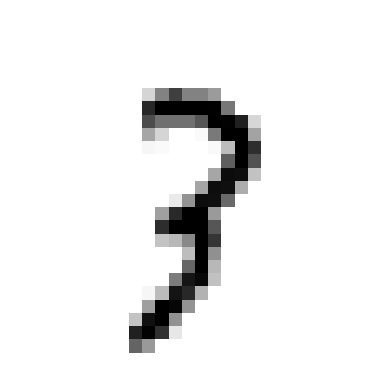

y[58]=[0.]


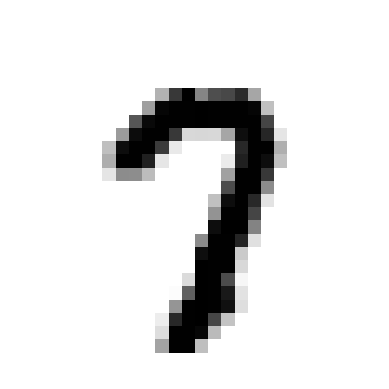

In [86]:
print('Regardons quelques images utilisees pour l\'apprentissage')
show_image(np.random.randint(0,1000),X_train,y_train)
show_image(np.random.randint(0,1000),X_train,y_train)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:
# Fonctions permettant de visualiser l'historique d'apprentissage
def plot_train_history_accuracy(history):
    acc = list(history.history.keys())[1]
    plt.plot(history.history[acc])
    plt.title('accuracy (précision)')
    plt.ylabel(acc)
    plt.xlabel('epoch')
    plt.show()
    
def plot_train_history_loss(history):
    loss = list(history.history.keys())[0]
    plt.plot(history.history[loss])
    plt.title('loss (perte)')
    plt.ylabel(loss)
    plt.xlabel('epoch')
    plt.show()

## Exercice 1
On crée un modèle à un seul neurone, utilisant la fonction de perte binary_crossentropy, l'optimiseur adam et la métrique binary_accuracy (on fait de la classification binaire).

In [87]:
# Creation du modele
# -- Parametres du modele : loss, optimizer, metrics
# -- loss : fonction de cout utilisee pour l'apprentissage
# -- optimizer : algorithme d'optimisation utilise pour l'apprentissage
# -- metrics : metrique utilisee pour evaluer le modele
model_1_functions = {'loss':'binary_crossentropy', 'optimizer':'adam','metrics':['binary_accuracy']}
# -- Archtitecture du modele : le modèle 'sequential' permet de créer un modèle en ajoutant des couches les unes après les autres
model_1 = Sequential()
# -- Ajout des couches (ici une seule couche)
# -- Dense : couche de neurones entièrement connectée
model_1.add(Dense(1, input_dim=num_pixels, kernel_initializer='uniform', activation='relu'))
# -- Compilation
model_1.compile(loss=model_1_functions['loss'],optimizer=model_1_functions['optimizer'],metrics=model_1_functions['metrics'])

In [124]:
# Entrainement du modele
# -- Parametres d'apprentissage
learning_parameters_1 = {'batch_size': 100, 'epochs': 50}
# -- Apprentissage: history capture ce qui s'est passe durant l'apprentissage
model_1_history = model_1.fit(X_train, y_train, batch_size=learning_parameters_1['batch_size'], epochs=learning_parameters_1['epochs'], verbose=0)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 785       
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


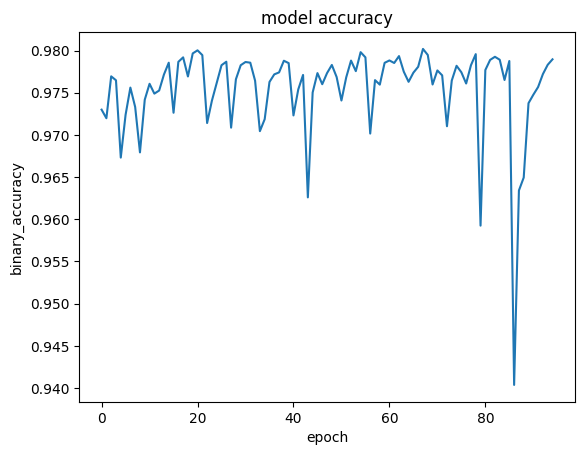

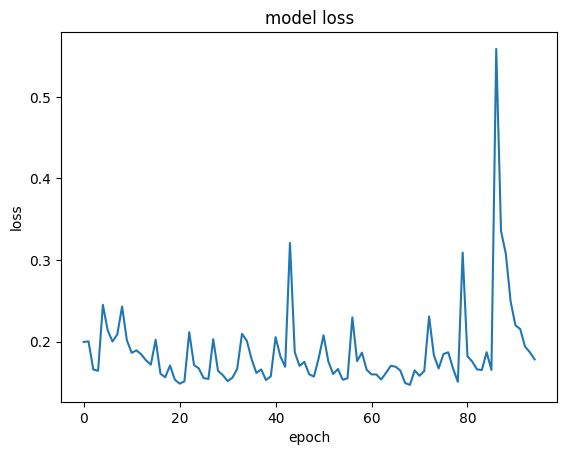

In [114]:
# -- Resume
model_1.summary()
plot_train_history_accuracy(model_1_history)
plot_train_history_loss(model_1_history)

In [115]:
# Prediction sur le jeu de test
final_loss_1, final_acc_1 = model_1.evaluate(X_test, y_test, verbose=0)
print("Perte finale sur les donnees de test: {0:.6f}, exactitude finale sur les donnees de test: {1:.6f}".format(final_loss_1, final_acc_1))
y_test_predictions_1 = model_1.predict(X_test)

Perte finale sur les donnees de test: 0.192557, exactitude finale sur les donnees de test: 0.979900
313/313 [==============================] - 0s 265us/step


y[8]=[0.]


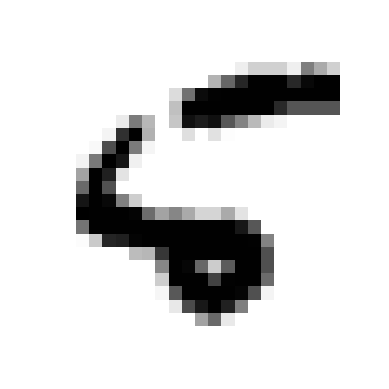

y[15]=[0.8303288]


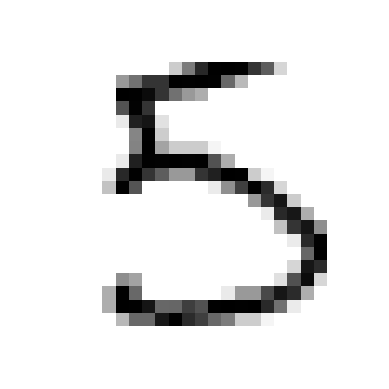

y[23]=[0.74144834]


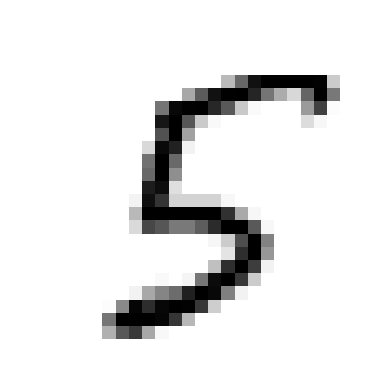

y[45]=[0.4607581]


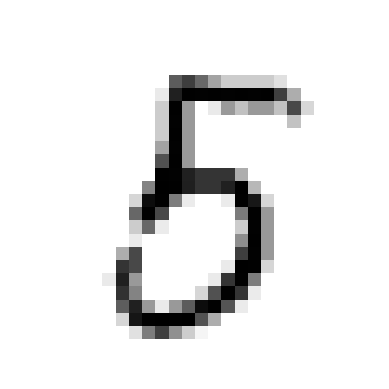

y[52]=[1.1184611]


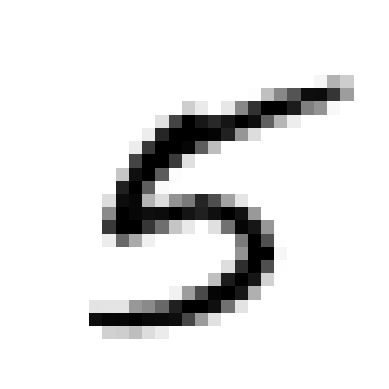

y[53]=[0.5069709]


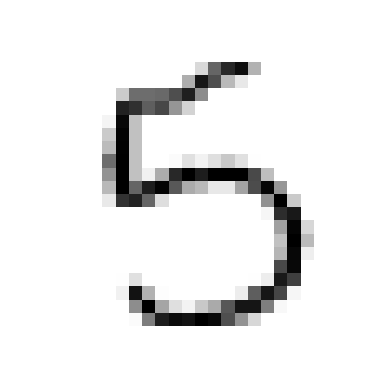

y[59]=[0.7595659]


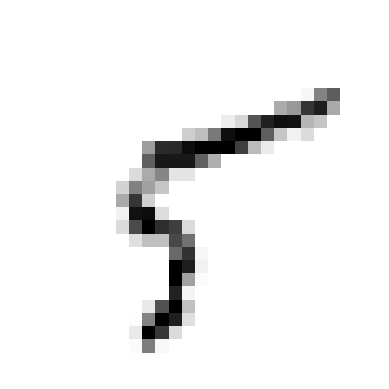

In [17]:
# Quelques exemples choisis au hasard
for i in range(100):
    if y_test[i]==1:
        show_image(i,X_test,y_test_predictions_1)
    if y_test_predictions_1[i]>0.5 and y_test[i]!=1:
        show_image(i,X_test,y_test_predictions_1)

#### Commentaires?

## Exercice 2
On ajoute une couche cachée de 64 neurones

In [99]:
# Creation du modele
# -- Parametres du modele
model_2_functions = {'loss':'binary_crossentropy', 'optimizer':'adam','metrics':['binary_accuracy']}
# -- Archtitecture du modele
model_2 = Sequential()
# -- Ajout des couches
# -- Dense : couche de neurones entièrement connectée
# -- input_dim : nombre de neurones en entrée
# -- kernel_initializer : initialisation des poids
# -- uniform : initialisation uniforme des poids entre -0.05 et 0.05 (par défaut)
model_2.add(Dense(64, input_dim=num_pixels, kernel_initializer='uniform', activation='relu'))
model_2.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# -- Compilation
model_2.compile(loss=model_2_functions['loss'],optimizer=model_2_functions['optimizer'],metrics=model_2_functions['metrics'])

In [100]:
# Entrainement du modele
# -- Parametres d'apprentissage
learning_parameters_2 = {'batch_size': 128, 'epochs': 10}
# -- Appresntissage: history capture ce qui s'est passe durant l'apprentissage
model_2_history = model_2.fit(X_train, y_train, batch_size=learning_parameters_2['batch_size'], epochs=learning_parameters_2['epochs'], verbose=0)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                50240     
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 50305 (196.50 KB)
Trainable params: 50305 (196.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


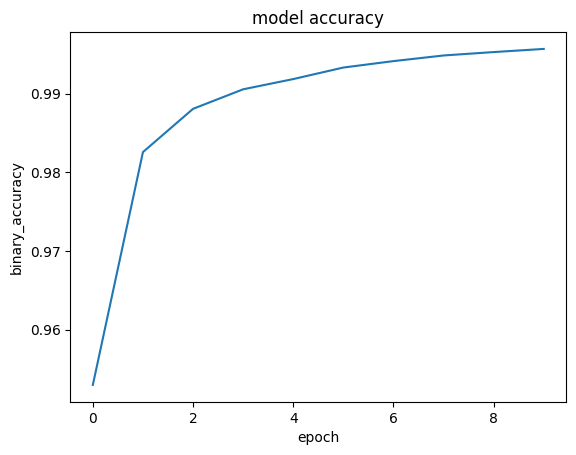

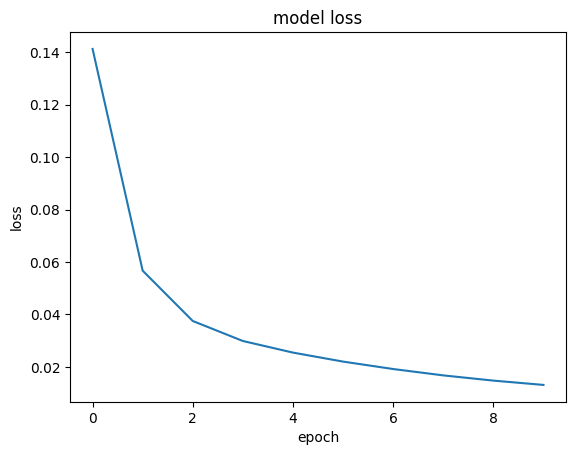

In [101]:
# -- Resume
model_2.summary()
plot_train_history_accuracy(model_2_history)
plot_train_history_loss(model_2_history)

In [109]:
# Prediction sur le jeu de test
final_loss_2, final_acc_2 = model_2.evaluate(X_test, y_test, verbose=0)
print("Perte finale sur les donnees de test: {0:.6f}, exactitude finale sur les donnees de test: {1:.6f}".format(final_loss_2, final_acc_2))
y_test_predictions_2 = model_2.predict(X_test)

Perte finale sur les donnees de test: 0.017036, exactitude finale sur les donnees de test: 0.994000
313/313 [==============================] - 0s 352us/step


y[8]=[0.18354815]


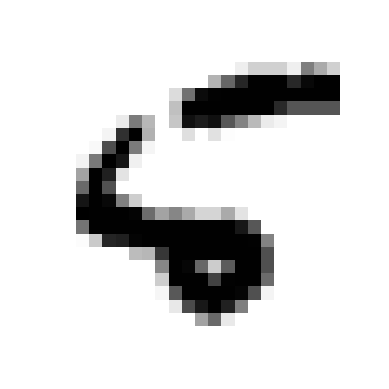

y[15]=[0.9915108]


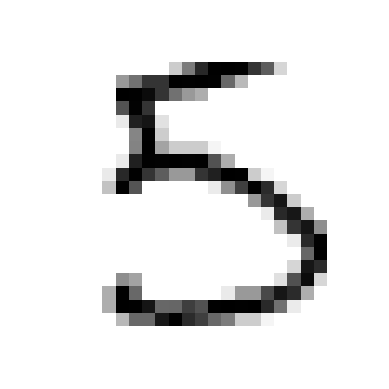

y[23]=[0.99969023]


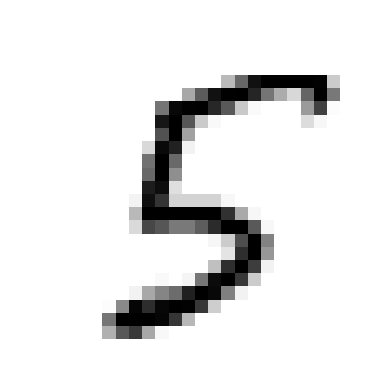

y[45]=[0.9757851]


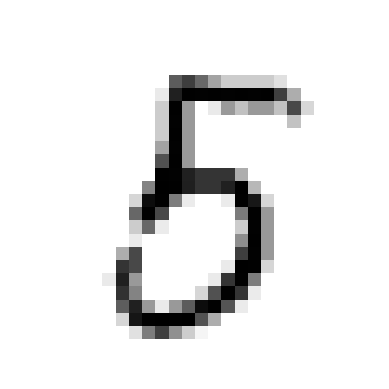

y[52]=[0.99325186]


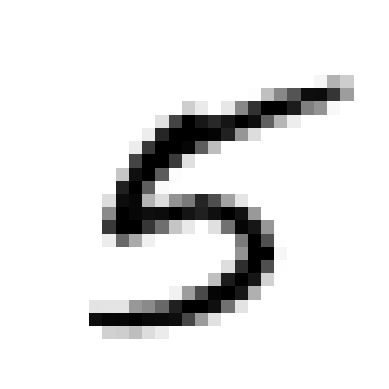

y[53]=[0.9971165]


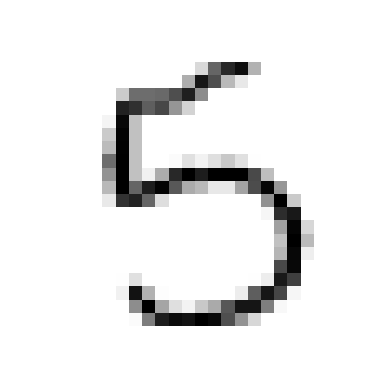

y[59]=[0.9964464]


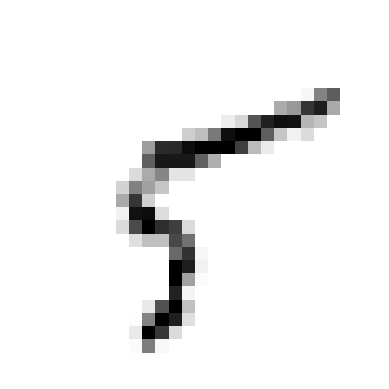

In [110]:
for i in range(100):
    if y_test[i]==1:
        show_image(i,X_test,y_test_predictions_2)
    if y_test_predictions_2[i]>0.5 and y_test[i]!=1:
        show_image(i,X_test,y_test_predictions_2)

## Exercice 3
On modifie le reseau pour reconnaitre tous les chiffres et non plus seulement faire de la classification binaire (5 versus not-5).

In [24]:
from keras import utils

num_classes = 10
y_train_cat = utils.to_categorical(y_train_0,num_classes)
y_test_cat  = utils.to_categorical(y_test_0,num_classes)

In [25]:
# Creation du modele
# -- Parametres du modele
model_3_functions = {'loss':'categorical_crossentropy', 'optimizer':'adam','metrics':['categorical_accuracy']}
# -- Archtitecture du modele
model_3 = Sequential()
model_3.add(Dense(64, input_dim=num_pixels, kernel_initializer='uniform', activation='relu'))
model_3.add(Dense(64, input_dim=num_pixels, kernel_initializer='uniform', activation='relu'))
model_3.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))
# -- Compilation
model_3.compile(loss=model_3_functions['loss'],optimizer=model_3_functions['optimizer'],metrics=model_3_functions['metrics'])

In [26]:
# Entrainement du modele
# -- Parametres d'apprentissage
learning_parameters_3 = {'batch_size': 128, 'epochs': 50}
# -- Appresntissage: history capture ce qui s'est passe durant l'apprentissage
model_3_history = model_3.fit(X_train, y_train_cat, batch_size=learning_parameters_3['batch_size'], epochs=learning_parameters_3['epochs'], verbose=0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


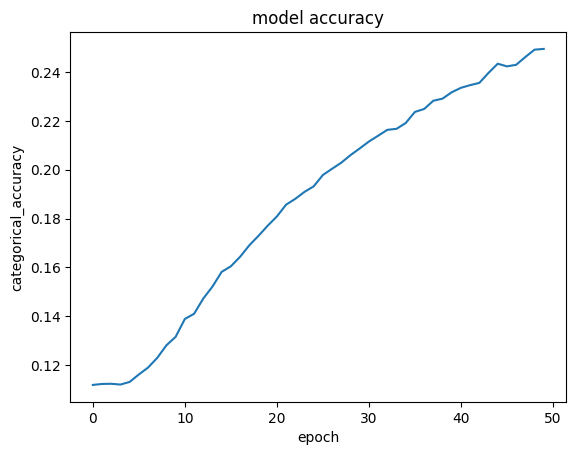

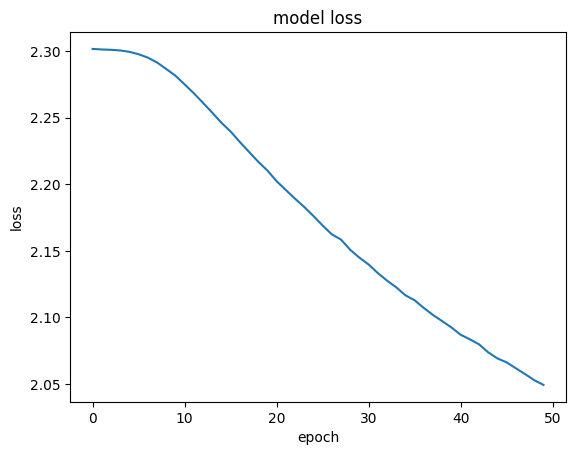

In [27]:
# -- Resume
model_3.summary()
plot_train_history_accuracy(model_3_history)
plot_train_history_loss(model_3_history)

In [28]:
# Prediction sur le jeu de test
final_loss_3, final_acc_3 = model_3.evaluate(X_test, y_test_cat, verbose=0)
print("Perte finale sur les donnees de test: {0:.6f}, exactitude finale sur les donnees de test: {1:.6f}".format(final_loss_3, final_acc_3))
y_test_predictions_3 = model_3.predict(X_test)

Perte finale sur les donnees de test: 2.616981, exactitude finale sur les donnees de test: 0.098400
313/313 [==============================] - 0s 390us/step


y[0]=[0.04481442 0.09900766 0.17082898 0.04869186 0.07700763 0.11732236
 0.18237664 0.09067383 0.05276005 0.11651659]


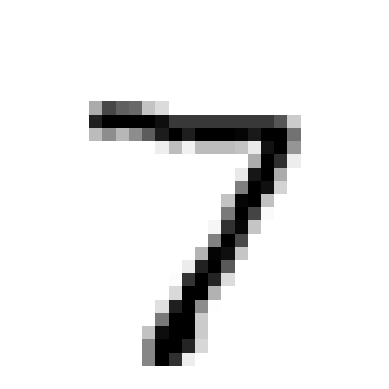

y[1]=[0.02611451 0.08052471 0.00996882 0.04887279 0.21069881 0.22487335
 0.14934234 0.01550213 0.08995806 0.14414442]


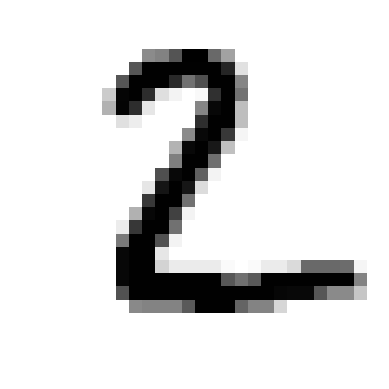

y[2]=[0.12030627 0.06561489 0.15427102 0.08860493 0.04929261 0.1022469
 0.11364696 0.12383854 0.11231969 0.06985817]


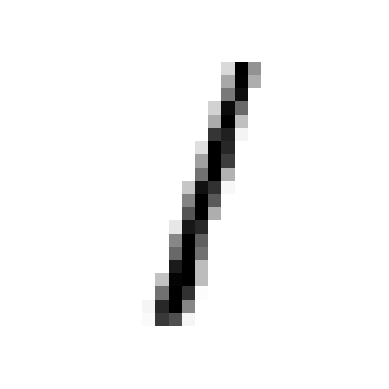

y[3]=[0.07773396 0.13332014 0.12336566 0.08200146 0.09808196 0.11255055
 0.09560183 0.08339192 0.06912194 0.12483057]


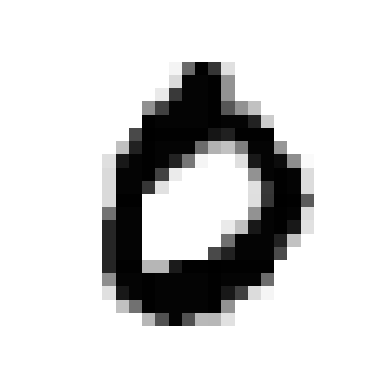

y[4]=[0.06989247 0.25090048 0.02316909 0.08062202 0.07544201 0.05068203
 0.13576554 0.07498386 0.11705553 0.12148685]


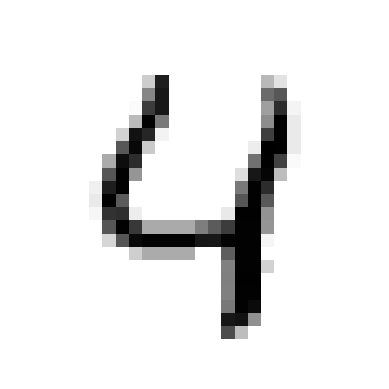

y[5]=[0.10477534 0.07150385 0.1492319  0.09894799 0.07386951 0.09040342
 0.11646108 0.12505451 0.0821284  0.08762403]


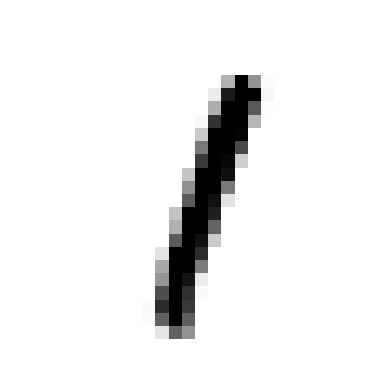

y[6]=[0.06865574 0.06672875 0.10008781 0.1300075  0.20145082 0.09735753
 0.06012623 0.07392399 0.09859182 0.10306982]


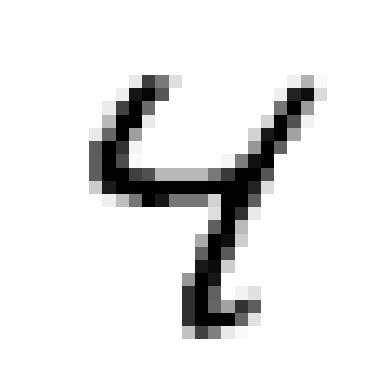

y[7]=[0.21342078 0.01944975 0.0315142  0.24639212 0.10507626 0.07090199
 0.06535622 0.05014701 0.17193289 0.02580884]


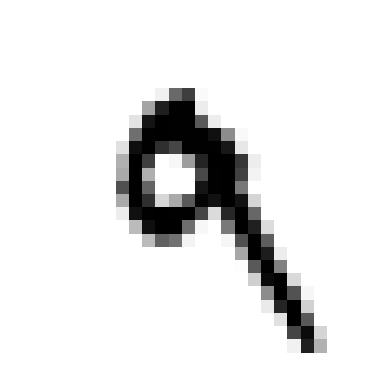

y[8]=[0.08476494 0.09486505 0.17858548 0.06748249 0.00121593 0.01531412
 0.02648328 0.05151304 0.35018215 0.12959346]


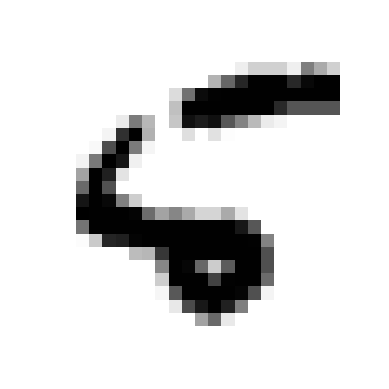

y[9]=[0.00647751 0.06662774 0.13368979 0.01575368 0.12842268 0.04868997
 0.1797692  0.06081646 0.06823787 0.29151517]


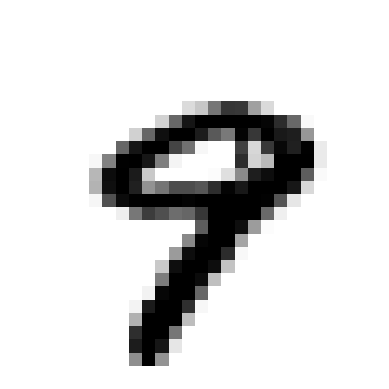

In [29]:
for i in range(10):
    show_image(i,X_test,y_test_predictions_3)

## Exercice 4

Un reseau convolutif.

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
https://www.supinfo.com/articles/single/8037-deep-learning-reseau-convolution

In [30]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [31]:
# On reformate les donnees
X_train_cnn = np.expand_dims(X_train_0, axis=3)
X_test_cnn  = np.expand_dims(X_test_0, axis=3)
input_shape = (28,28,1)

In [33]:
# Creation du modele
# -- Parametres du modele
model_4_functions = {'loss':'categorical_crossentropy', 'optimizer':'adam','metrics':['categorical_accuracy']}
model_4_cnn_parameters = {'num_filters':8,'filter_size':3,'pool_size':2}
# -- Archtitecture du modele
model_4 = Sequential()
model_4.add(Conv2D(model_4_cnn_parameters['num_filters'], model_4_cnn_parameters['filter_size'], input_shape=input_shape, activation='relu'))
model_4.add(MaxPooling2D(pool_size=model_4_cnn_parameters['pool_size']))
model_4.add(Flatten())
model_4.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))
# -- Compilation
model_4.compile(loss=model_4_functions['loss'],optimizer=model_4_functions['optimizer'],metrics=model_4_functions['metrics'])

In [34]:
# Entrainement du modele
# -- Parametres d'apprentissage
learning_parameters_4 = {'batch_size': 128, 'epochs': 5}
# -- Apprentissage: history capture ce qui s'est passe durant l'apprentissage
model_4_history = model_4.fit(X_train_cnn, y_train_cat, batch_size=learning_parameters_4['batch_size'], epochs=learning_parameters_4['epochs'], verbose=0)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 8)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1352)              0         
                                                                 
 dense_7 (Dense)             (None, 10)                13530     
                                                                 
Total params: 13610 (53.16 KB)
Trainable params: 13610 (53.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


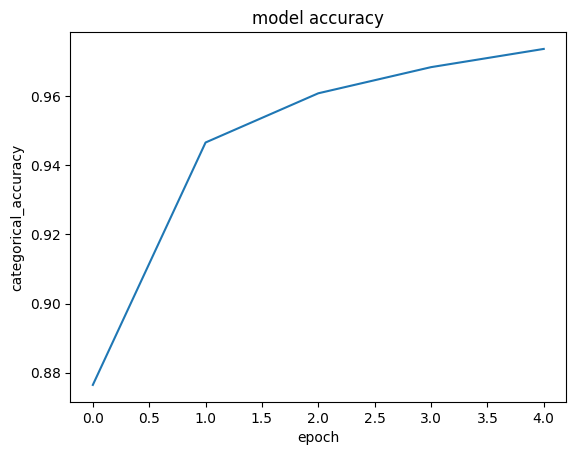

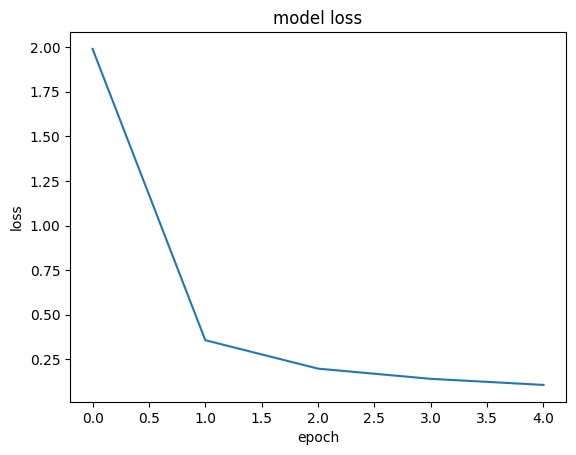

In [35]:
# -- Resume
model_4.summary()
plot_train_history_accuracy(model_4_history)
plot_train_history_loss(model_4_history)

In [36]:
# Prediction sur le jeu de test
final_loss_4, final_acc_4 = model_4.evaluate(X_test_cnn, y_test_cat, verbose=0)
print("Perte finale sur les donnees de test: {0:.6f}, exactitude finale sur les donnees de test: {1:.6f}".format(final_loss_4, final_acc_4))
y_test_predictions_4 = model_4.predict(X_test_cnn)

Perte finale sur les donnees de test: 0.136700, exactitude finale sur les donnees de test: 0.970500
313/313 [==============================] - 0s 649us/step


y[0]=[1.8310050e-17 3.3394091e-14 1.3135756e-11 2.3161149e-08 3.2439513e-15
 1.7772122e-16 1.0441236e-24 1.0000000e+00 2.9537643e-11 3.3738842e-11]


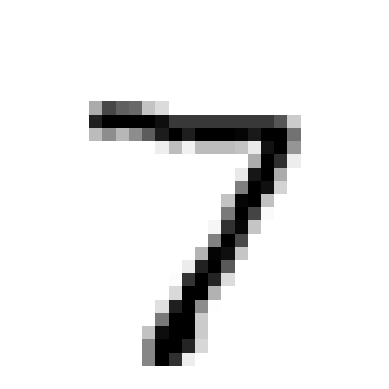

y[1]=[1.1906232e-14 4.5722415e-12 9.9999976e-01 1.7995206e-15 2.0999385e-24
 5.9490439e-13 2.6329613e-07 1.8576307e-20 1.0232354e-12 4.4641565e-26]


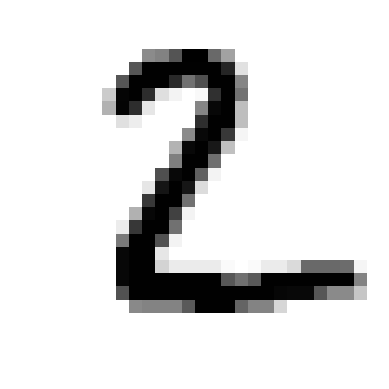

y[2]=[5.6421794e-12 9.9999845e-01 5.5767475e-07 4.4331314e-10 6.8036488e-09
 7.0741520e-12 4.7871772e-12 7.3908852e-09 9.9569218e-07 2.3593721e-10]


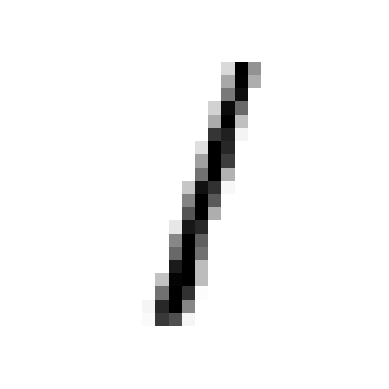

y[3]=[9.9999928e-01 7.1165870e-15 6.1971269e-07 1.2418290e-13 7.7400968e-12
 7.9227497e-10 1.1890519e-07 5.0375073e-09 7.3163307e-09 1.6117709e-09]


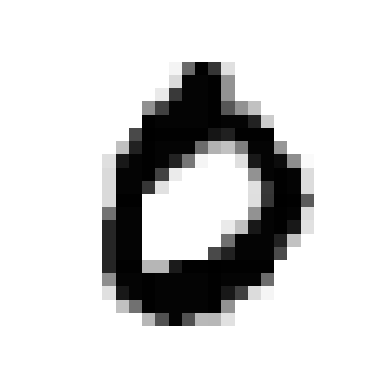

y[4]=[1.3500984e-17 1.1525483e-15 2.0313354e-17 4.1405863e-15 1.0000000e+00
 3.4311034e-18 3.3424164e-18 2.3871070e-09 1.9960767e-14 1.4484937e-10]


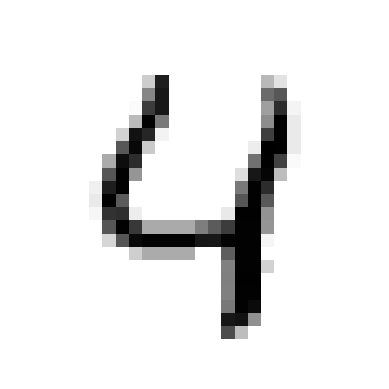

y[5]=[3.6758240e-12 9.9966526e-01 2.3665015e-08 6.9478272e-09 1.9736490e-07
 2.1170202e-13 2.6269468e-13 3.3415604e-04 3.6910652e-07 7.9155171e-09]


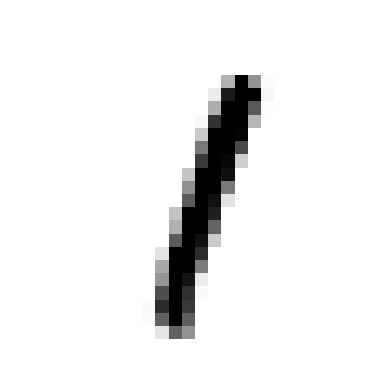

y[6]=[2.8652406e-16 9.0080783e-07 3.1382552e-09 4.5592246e-09 9.9973160e-01
 5.3954640e-08 8.6263443e-17 1.8165557e-06 4.0493625e-05 2.2519802e-04]


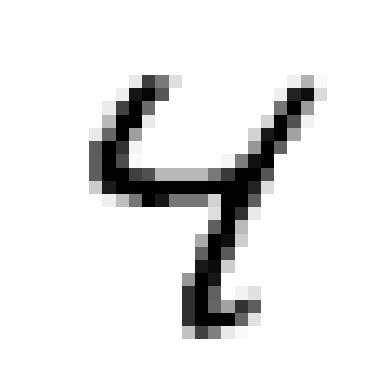

y[7]=[2.2967911e-23 8.1688233e-12 2.9856762e-09 5.2798396e-07 1.5266514e-05
 7.8905050e-06 1.0947745e-26 1.2643879e-10 2.3059299e-06 9.9997401e-01]


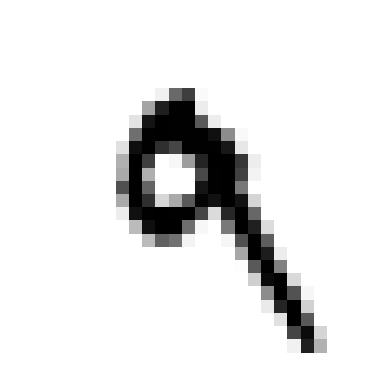

y[8]=[1.8807612e-12 1.4854570e-19 9.7151670e-12 7.9360389e-15 1.3109959e-12
 9.9938917e-01 5.4281898e-04 5.7036197e-20 6.8001988e-05 2.1744488e-14]


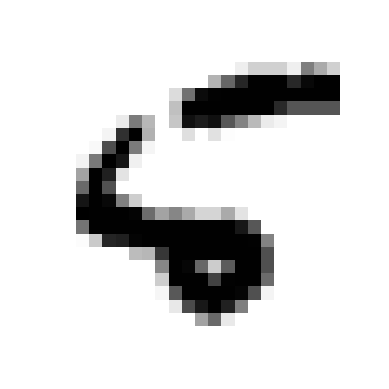

y[9]=[8.5199474e-13 1.0163774e-13 1.5600202e-12 2.2982899e-08 7.2525803e-04
 3.4661749e-09 1.9828801e-22 1.3036270e-01 5.0527751e-06 8.6890692e-01]


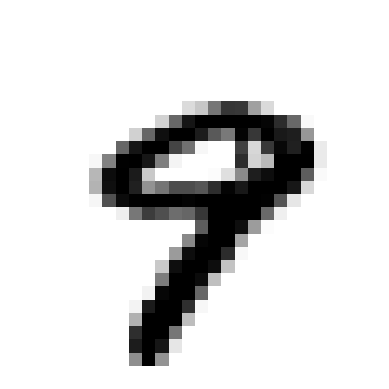

In [37]:
for i in range(10):
    show_image(i,X_test,y_test_predictions_4)